In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['Source Han Sans TW', 'sans-serif']

In [2]:
df = pd.read_csv('../data/concat_dfs.csv')
adj_df= pd.read_csv('../data/adjusted_class.csv')

In [3]:
df.head()

,Rank,Account,Character,Class,Level,Experience,Dead,Atlas_Invasion,Delirium_Everywhere,Endless_Delve,Endless_Heist,Expedition,Standard,Scourge,Ultimatum,Character Count
0,1,Kiom,qazwsxedcrfvtgbyhnujmi,Saboteur,100,4250334444,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
1,2,eliehh,Eliot_invaded,Saboteur,100,4250334444,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19
2,3,김겨울,DD는원래사기였다ㆍ김겨울ㆍ따라잡지말아주세요,Necromancer,99,3959950552,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20
3,4,Akiobird,RhiㆍUnlucky,Necromancer,99,3953455777,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
4,5,Senizen,Senvasion,Inquisitor,99,3936854161,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 16000 non-null  int64  
 1   Account              16000 non-null  object 
 2   Character            16000 non-null  object 
 3   Class                16000 non-null  object 
 4   Level                16000 non-null  int64  
 5   Experience           16000 non-null  int64  
 6   Dead                 16000 non-null  int64  
 7   Atlas_Invasion       16000 non-null  float64
 8   Delirium_Everywhere  16000 non-null  float64
 9   Endless_Delve        16000 non-null  float64
 10  Endless_Heist        16000 non-null  float64
 11  Expedition           16000 non-null  float64
 12  Standard             16000 non-null  float64
 13  Scourge              16000 non-null  float64
 14  Ultimatum            16000 non-null  float64
 15  Character Count      16000 non-null 

In [5]:
len(df['Account'].unique())

6922

In [6]:
df['Account'].describe()

count     16000
unique     6922
top        3518
freq         34
Name: Account, dtype: object

In [7]:
df['Account'].value_counts()

3518             34
Karamon10        34
nikoon           29
SteveAustin      28
Celly123         27
                 ..
aayyae            1
Kelenvy           1
Chiptallica       1
aresprophet       1
HachcomBabaow     1
Name: Account, Length: 6922, dtype: int64

In [8]:
df[df['Character Count'] > 30]['Dead'].mean()

0.5735294117647058

In [9]:
#6 base classes, 19 Ascendant classes
df['Class'].value_counts()

Champion        1886
Gladiator       1811
Necromancer     1505
Saboteur        1117
Occultist       1100
Inquisitor      1024
Raider           986
Trickster        699
Elementalist     680
Hierophant       659
Guardian         625
Ascendant        618
Chieftain        615
Juggernaut       566
Berserker        441
Slayer           432
Pathfinder       417
Assassin         368
Deadeye          363
Witch             24
Duelist           19
Ranger            13
Scion             13
Templar            7
Marauder           7
Shadow             5
Name: Class, dtype: int64

In [10]:
df[df['Account'] == 'Kiom'].index

Int64Index([0, 2894, 4112, 4469, 12150, 12771], dtype='int64')

In [11]:
df['Level'].describe()

count    16000.000000
mean        87.535813
std         12.718995
min         42.000000
25%         81.000000
50%         93.000000
75%         96.000000
max        100.000000
Name: Level, dtype: float64

In [12]:
#63% fatality rate amongst all 16,000 characters in 8 leagues
df['Dead'].value_counts(normalize=True)

1    0.631188
0    0.368812
Name: Dead, dtype: float64

In [13]:
df.groupby('Account').agg(['mean'])['Dead'].sort_values(by='mean', ascending=True)

,mean
Account,
SpyChan,0.0
degraaf,0.0
Johnny_Annihilation,0.0
Johnnyboy30,0.0
deddoedalus,0.0
...,...
beensrsly,1.0
beiron163,1.0
benedikt1337,1.0


In [14]:
df.groupby('Class').agg(['mean'])['Level'].sort_values(by='mean', ascending=True)

,mean
Class,
Ranger,51.230769
Duelist,52.052632
Templar,54.000000
Scion,56.307692
Witch,56.791667
Shadow,65.400000
Marauder,66.857143
Deadeye,82.063361
Pathfinder,83.484412


In [15]:
df.groupby('Account').describe()

Rank                                                                \
          count    mean          std     min      25%     50%     75%     max   
Account                                                                         
0000        8.0   387.0   327.653563     4.0   129.75   429.5   510.5   998.0   
007noctis   2.0  1053.0  1011.162697   338.0   695.50  1053.0  1410.5  1768.0   
00eric      1.0   826.0          NaN   826.0   826.00   826.0   826.0   826.0   
00fant      1.0   894.0          NaN   894.0   894.00   894.0   894.0   894.0   
01359256    1.0  1389.0          NaN  1389.0  1389.00  1389.0  1389.0  1389.0   
...         ...     ...          ...     ...      ...     ...     ...     ...   
티모유미        1.0  1061.0          NaN  1061.0  1061.00  1061.0  1061.0  1061.0   
판타라이        2.0   571.0   526.087445   199.0   385.00   571.0   757.0   943.0   
하이델른        2.0   574.0   237.587878   406.0   490.00   574.0   658.0   742.0   
형준39        1.0   997.0          NaN   997.0   997.00   997.0   997.0   997.0   
화랑칸         1.0  1847.0          NaN  1847.0  1847.00  1847.0  1847.0  1847.0   

          Level         ... Ultimatum      Character Count                 \
          count   mean  ...       75%  max           count mean  std  min   
Account                 ...                                                 
0000        8.0  90.25  ...       0.0  0.0             8.0  8.0  0.0  8.0   
007noctis   2.0  96.50  ...       0.0  0.0             2.0  2.0  0.0  2.0   
00eric      1.0  92.00  ...       0.0  0.0             1.0  1.0  NaN  1.0   
00fant      1.0  95.00  ...       1.0  1.0             1.0  1.0  NaN  1.0   
01359256    1.0  93.00  ...       0.0  0.0             1.0  1.0  NaN  1.0   
...         ...    ...  ...       ...  ...             ...  ...  ...  ...   
티모유미        1.0  75.00  ...       0.0  0.0             1.0  1.0  NaN  1.0   
판타라이        2.0  84.00  ...       0.0  0.0             2.0  2.0  0.0  2.0   
하이델른        2.0  84.00  ...       0.0  0.0             2.0  2.0  0.0  2.0   
형준39        1.0  70.00  ...       0.0  0.0             1.0  1.0  NaN  1.0   
화랑칸         1.0  69.00  ...       0.0  0.0             1.0  1.0  NaN  1.0   

                               
           25%  50%  75%  max  
Account                        
0000       8.0  8.0  8.0  8.0  
007noctis  2.0  2.0  2.0  2.0  
00eric     1.0  1.0  1.0  1.0  
00fant     1.0  1.0  1.0  1.0  
01359256   1.0  1.0  1.0  1.0  
...        ...  ...  ...  ...  
티모유미       1.0  1.0  1.0  1.0  
판타라이       2.0  2.0  2.0  2.0  
하이델른       2.0  2.0  2.0  2.0  
형준39       1.0  1.0  1.0  1.0  
화랑칸        1.0  1.0  1.0  1.0  

[6922 rows x 104 columns]

In [16]:
df.groupby('Account')['Level'].describe()

,count,mean,std,min,25%,50%,75%,max
Account,,,,,,,,
0000,8.0,90.25,10.498299,70.0,84.25,94.0,97.75,100.0
007noctis,2.0,96.50,0.707107,96.0,96.25,96.5,96.75,97.0
00eric,1.0,92.00,NaN,92.0,92.00,92.0,92.00,92.0
00fant,1.0,95.00,NaN,95.0,95.00,95.0,95.00,95.0
01359256,1.0,93.00,NaN,93.0,93.00,93.0,93.00,93.0
...,...,...,...,...,...,...,...,...
티모유미,1.0,75.00,NaN,75.0,75.00,75.0,75.00,75.0
판타라이,2.0,84.00,11.313708,76.0,80.00,84.0,88.00,92.0
하이델른,2.0,84.00,5.656854,80.0,82.00,84.0,86.00,88.0


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Source Han Sans TW, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Source Han Sans TW, sans-serif
C:\Users\Chubchubs\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44608 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Chubchubs\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Chubchubs\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Chubchubs\anaconda3\lib\site-packages\ma

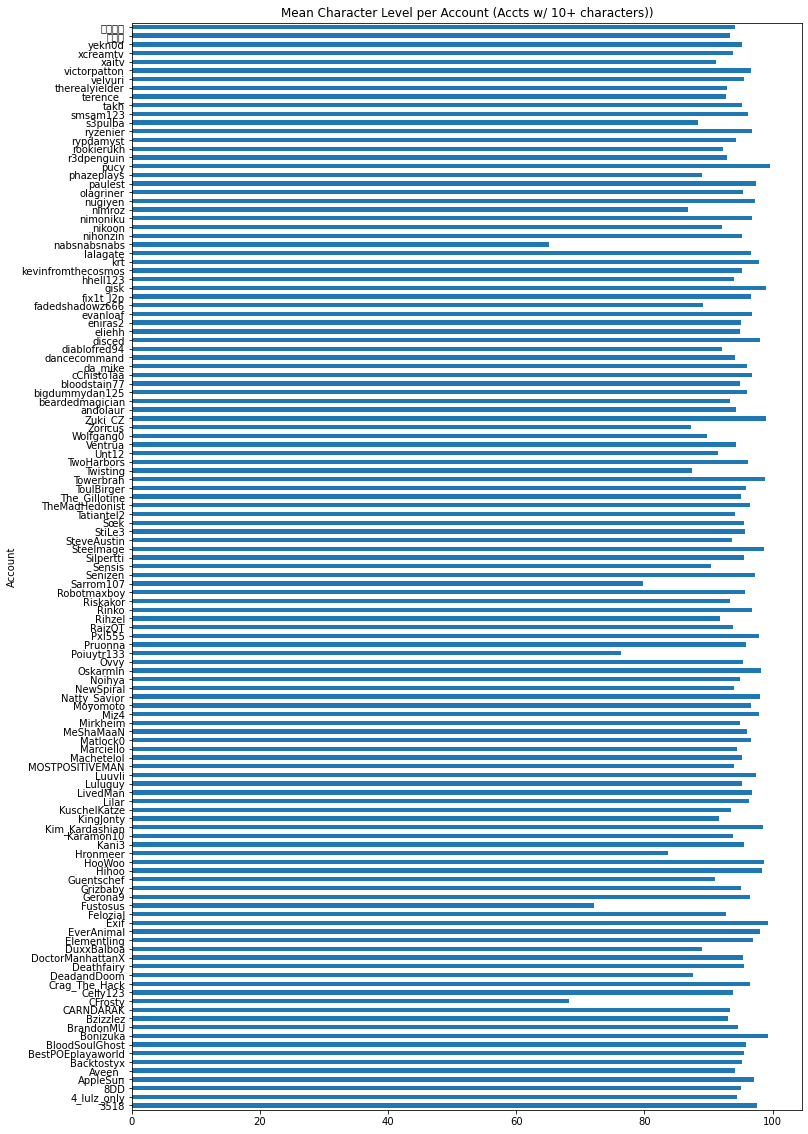

In [17]:
#The glyph warnings are for korean/other characters not found within the given font.
df[df['Character Count'] > 10].groupby('Account')['Level'].mean().plot(kind='barh',
                                                                       figsize=(12,20),
                                                                       title="Mean Character Level per Account (Accts w/ 10+ characters))");

In [18]:
df.groupby('Account')['Class'].describe()

,count,unique,top,freq
Account,,,,
0000,8,4,Pathfinder,3
007noctis,2,2,Pathfinder,1
00eric,1,1,Pathfinder,1
00fant,1,1,Hierophant,1
01359256,1,1,Champion,1
...,...,...,...,...
티모유미,1,1,Necromancer,1
판타라이,2,2,Guardian,1
하이델른,2,1,Ascendant,2


C:\Users\Chubchubs\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49888 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Chubchubs\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Chubchubs\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Chubchubs\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45817 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Chubchubs\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44608 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Chubchubs\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Gl

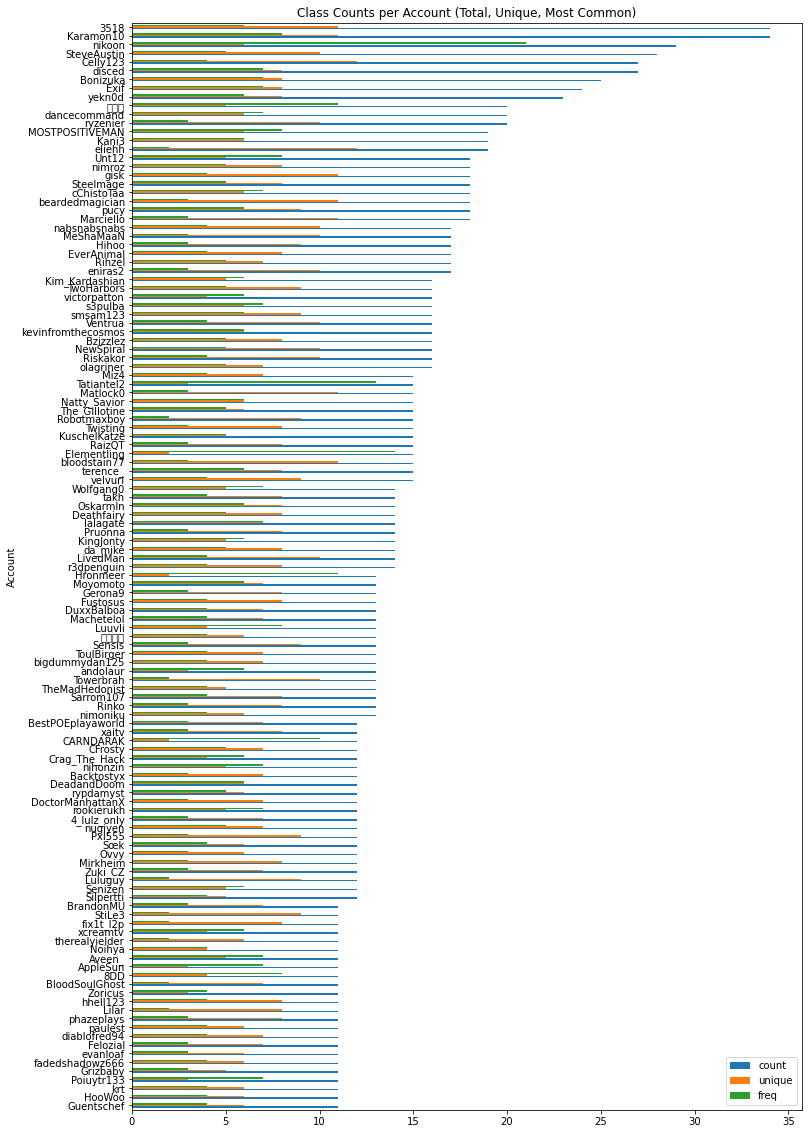

In [19]:
df[df['Character Count'] > 10].groupby('Account')['Class'].describe().sort_values(by = 'count', ascending=True).plot(kind='barh', figsize=(12,20), title="Class Counts per Account (Total, Unique, Most Common)");

In [20]:
df.head(20)

,Rank,Account,Character,Class,Level,Experience,Dead,Atlas_Invasion,Delirium_Everywhere,Endless_Delve,Endless_Heist,Expedition,Standard,Scourge,Ultimatum,Character Count
0,1,Kiom,qazwsxedcrfvtgbyhnujmi,Saboteur,100,4250334444,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
1,2,eliehh,Eliot_invaded,Saboteur,100,4250334444,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19
2,3,김겨울,DD는원래사기였다ㆍ김겨울ㆍ따라잡지말아주세요,Necromancer,99,3959950552,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20
3,4,Akiobird,RhiㆍUnlucky,Necromancer,99,3953455777,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
4,5,Senizen,Senvasion,Inquisitor,99,3936854161,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12
5,6,NewSpiral,HarvestRIP,Champion,98,3814407873,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16
6,7,CptDoigralis,Bebralives,Saboteur,98,3778737928,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
7,8,cestarix,ctx_Bedge,Assassin,98,3758234946,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
8,9,phazeplays,PhazeGoAgane,Inquisitor,98,3717640732,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11
9,10,theDOMF,DomfSpectres,Necromancer,98,3679741924,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


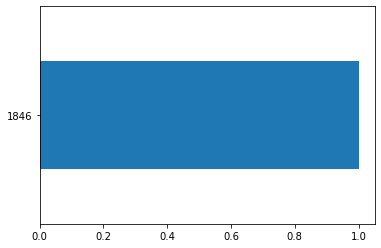

In [21]:
df[df['Atlas_Invasion'] == 1].groupby('Account')['Dead'].plot(kind='barh');

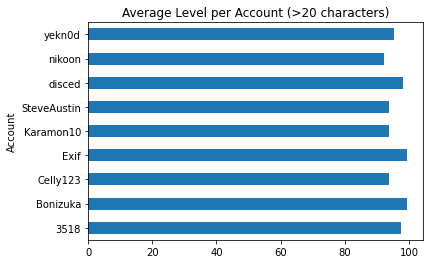

In [22]:
df[df['Character Count'] >20].groupby('Account')['Level'].mean().plot(kind='barh',
                                                                      title="Average Level per Account (>20 characters)");

In [23]:
df['Dead'].value_counts(normalize=True)

1    0.631188
0    0.368812
Name: Dead, dtype: float64

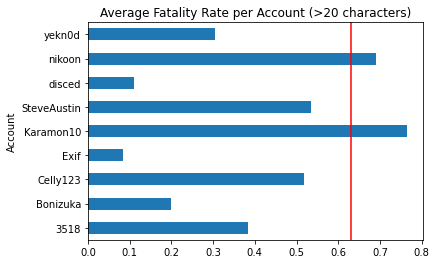

In [24]:
df[df['Character Count'] >20].groupby('Account')['Dead'].mean().plot(kind='barh',
                                                                     title = "Average Fatality Rate per Account (>20 characters)");
plt.axvline(df['Dead'].mean(), color='r');

C:\Users\Chubchubs\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44608 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Chubchubs\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Chubchubs\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Chubchubs\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49888 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Chubchubs\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Chubchubs\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Gl

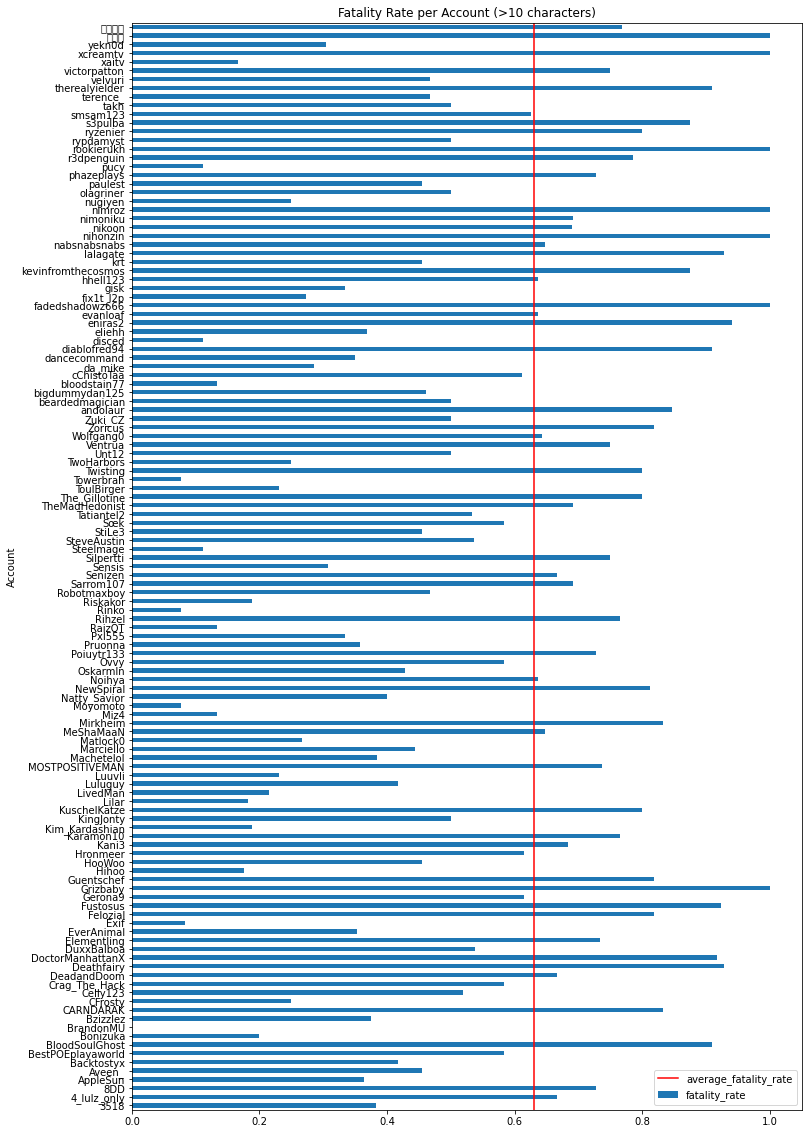

In [25]:
df[df['Character Count'] >10].groupby('Account')['Dead'].mean().plot(kind='barh', figsize=(12, 20),label='fatality_rate');
plt.title('Fatality Rate per Account (>10 characters)')
plt.axvline(df['Dead'].mean(), color='r', label='average_fatality_rate');
plt.rc('axes', unicode_minus=False)
plt.legend()

In [26]:
df[df['Character Count'] >20].groupby('Account')['Dead'].mean()

Account
3518           0.382353
Bonizuka       0.200000
Celly123       0.518519
Exif           0.083333
Karamon10      0.764706
SteveAustin    0.535714
disced         0.111111
nikoon         0.689655
yekn0d         0.304348
Name: Dead, dtype: float64

In [27]:
df[df['Character Count'] <10].groupby('Account')['Dead'].mean()

Account
0000         0.75
007noctis    0.50
00eric       1.00
00fant       1.00
01359256     0.00
             ... 
티모유미         1.00
판타라이         1.00
하이델른         1.00
형준39         1.00
화랑칸          1.00
Name: Dead, Length: 6760, dtype: float64

In [28]:
df.groupby('Class')['Dead'].mean()

Class
Ascendant       0.647249
Assassin        0.614130
Berserker       0.698413
Champion        0.609226
Chieftain       0.634146
Deadeye         0.650138
Duelist         0.578947
Elementalist    0.704412
Gladiator       0.641634
Guardian        0.568000
Hierophant      0.691958
Inquisitor      0.676758
Juggernaut      0.625442
Marauder        0.571429
Necromancer     0.569435
Occultist       0.628182
Pathfinder      0.649880
Raider          0.662272
Ranger          0.692308
Saboteur        0.623993
Scion           0.538462
Shadow          0.600000
Slayer          0.678241
Templar         0.714286
Trickster       0.539342
Witch           0.541667
Name: Dead, dtype: float64

In [29]:
df['Class'].value_counts()

Champion        1886
Gladiator       1811
Necromancer     1505
Saboteur        1117
Occultist       1100
Inquisitor      1024
Raider           986
Trickster        699
Elementalist     680
Hierophant       659
Guardian         625
Ascendant        618
Chieftain        615
Juggernaut       566
Berserker        441
Slayer           432
Pathfinder       417
Assassin         368
Deadeye          363
Witch             24
Duelist           19
Ranger            13
Scion             13
Templar            7
Marauder           7
Shadow             5
Name: Class, dtype: int64

In [30]:
adj_df[adj_df['Level'] >90]['Class'].value_counts()

Duelist     3133
Witch       1914
Shadow      1410
Templar     1208
Ranger      1047
Marauder     917
Scion        340
Name: Class, dtype: int64

In [31]:
adj_df.groupby('Class')['Dead'].mean()

Class
Duelist     0.630424
Marauder    0.648250
Ranger      0.657111
Scion       0.645008
Shadow      0.595249
Templar     0.651836
Witch       0.616500
Name: Dead, dtype: float64

<AxesSubplot:>

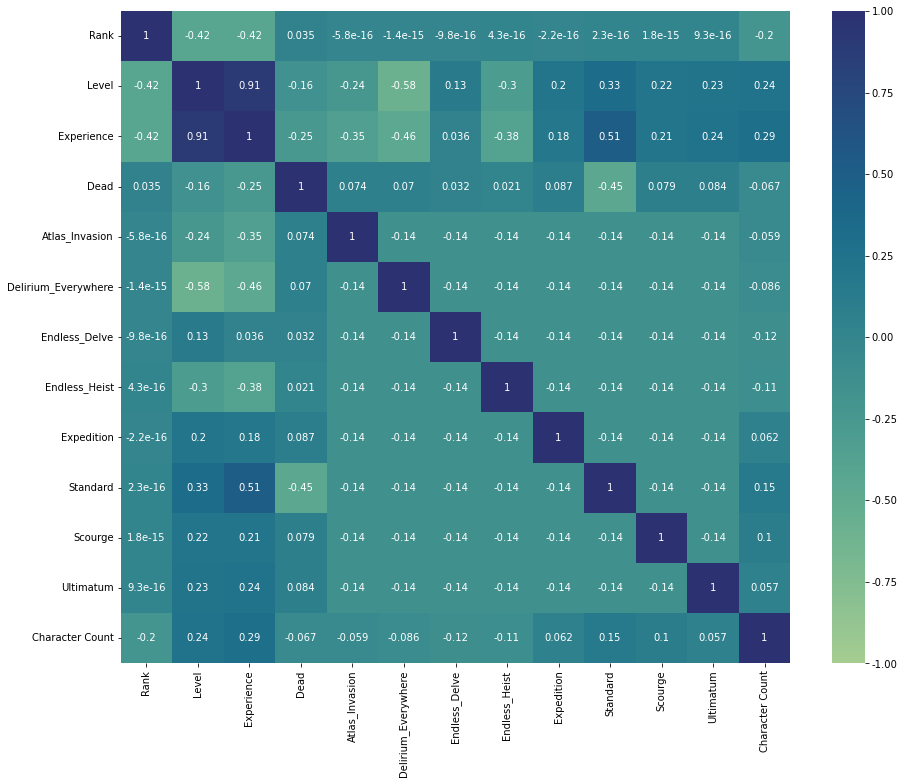

In [32]:
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), vmax=1, vmin=-1,annot=True, cmap='crest')